In [4]:
import pandas as pd

## imports for Python, Pandas

In [54]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
json.load((open(r"C:\Users\yi6\Desktop\ultimate_challenge\logins.json")))

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [19]:
# load as Pandas dataframe
sample_json_df = pd.read_json(r"C:\Users\yi6\Desktop\ultimate_challenge\logins.json")
sample_json_df.index = sample_json_df.login_time

a = sample_json_df.groupby(pd.TimeGrouper('15Min')).count()

print(a)


                     login_time
login_time                     
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1
1970-01-01 21:15:00           4
1970-01-01 21:30:00           0
1970-01-01 21:45:00           4
1970-01-01 22:00:00           9
1970-01-01 22:15:00           8
1970-01-01 22:30:00           1
1970-01-01 22:45:00           3
1970-01-01 23:00:00          16
1970-01-01 23:15:00          13
1970-01-01 23:30:00          14
1970-01-01 23:45:00          15
1970-01-02 00:00:00          10
1970-01-02 00:15:00          18
1970-01-02 00:30:00          12
1970-01-02 00:45:00          13
1970-01-02 01:00:00           9
1970-01-02 01:15:00           8
1970-01-02 01:30:00          10
1970-01-02 01:45:00           6
1970-01-02 02:00:00           7
1970-01-02 02:15:00          18
1970-01-02 02:30:00          12
1970-01-02 02:45:00           6
1970-01-02 03:00:00          12
1970-01-

In [31]:
print(a.describe())
print(a.info())

        login_time
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
login_time    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB
None


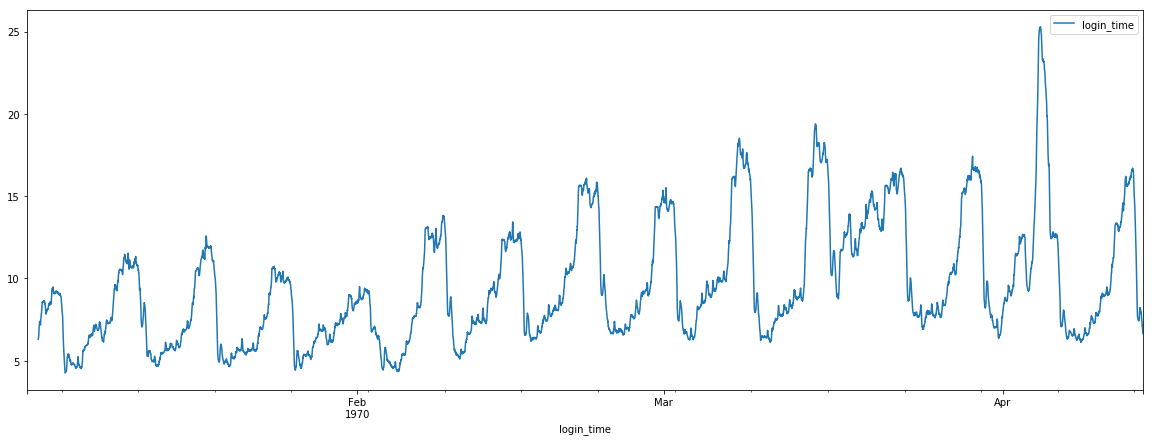

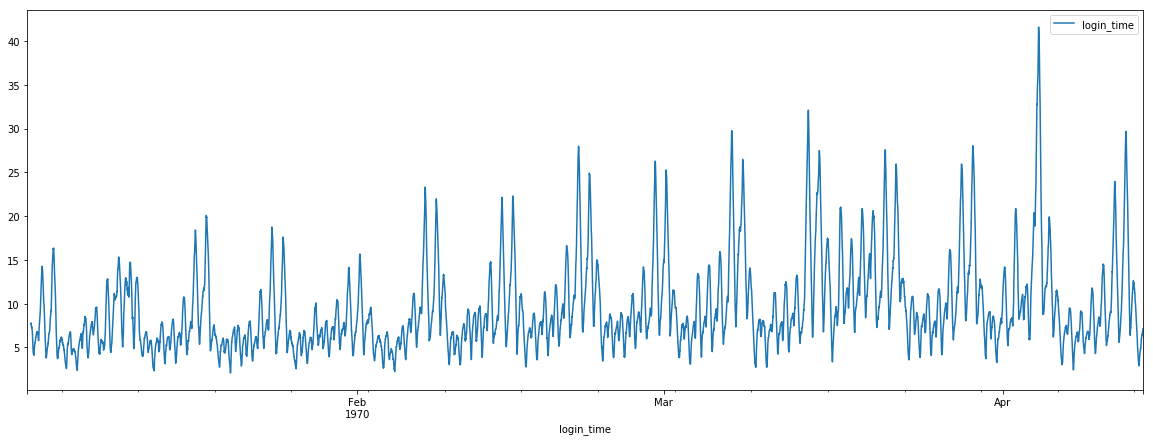

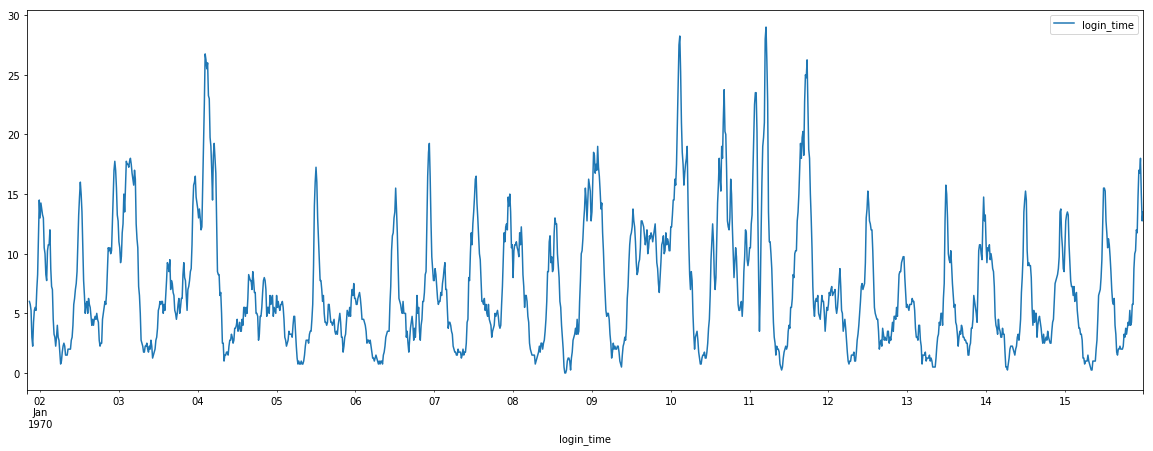

In [40]:
a.rolling(100).mean().plot(figsize = (20,7))
plt.show()

a.rolling(36).mean().plot(figsize = (20,7))
plt.show()

a['1970-01-01':'1970-01-15'].rolling(4).mean().plot(figsize = (20,7))
plt.show()

There are three components of non-stationarity in the data: weekly and daily cycles and trend. Clicks peak during the weekends and have lower average counts through the week. There are also hourly peaks within each day that seem to typically occur at night, but there are also peaks during the day. Finally, the series has a positive trend. 

Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: The metric I would choose would be reduction in difference between daily peak and trough by city. The assumption being that before the toll, the cities should cycle opposite to each other, so with more drivers driving between cities, that peak trough difference should decrease. To define max possible benefit, it would also be possible to remove the cycle of one city from the other, by shifting the data 12 hours and subtracting. For each city, I would then run a dickey fuller test to quantify the stationarity and compare this to the actual observed data.


2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. 

Answer:I would collect data before and after implementing the free toll program. I would ensure that the time period over which data is collected is at a regular step. If data is collected at the toll booth itself, I would make sure that the location of the sampling is not biasing the results. I would also ensure that the tiem scale over which data is collected covers all cycle lengths, or would correct for any trend or cycle in the final results (e.g., yearly holidays etc).

b. what statistical test(s) you will conduct to verify the significance of the
observation

Answer:If all cars could be measured at the point of entry into the city, then no statistical methods would be necessary. If not, then I would ensure that a random sample of cars every hour was collected. My metric is mean difference in peak trough difference by day per city. I would do a bootstrap replicate test on the data and resample via bagging to define my theoretical distribution. IF the observed statistic was within the 95% confidence interval, I would assume that the pre and post toll mean difference populations were statistically different.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Answer: It is possible that there could be a statistically siginificant result where the difference is not meaningful.  I would make sure to try and quantify the magnitude of the change. One way to do this would be to calculate the difference in terms of total drivers in the other city, so that they could have an estimate of the absolute impact of this policy.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [75]:
a = pd.DataFrame(json.load((open(r"C:\Users\yi6\Desktop\ultimate_challenge\ultimate_data_challenge.json"))))

#target column
a["Active"] = df.last_trip_date >= "2014-06-01" 

print(a.Active)
print(a.head())
print(a.last_trip_date.max())
print(a.signup_date.max())
print(a.last_trip_date.min())
print(a.signup_date.min())

#missing some significant values of average driver rating, planning to impute these....
print(a.info())

print(a.columns)





0         True
1        False
2        False
3         True
4        False
5         True
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13        True
14       False
15       False
16        True
17        True
18        True
19        True
20       False
21       False
22       False
23        True
24       False
25       False
26       False
27       False
28        True
29       False
         ...  
49970    False
49971     True
49972     True
49973     True
49974    False
49975     True
49976     True
49977    False
49978    False
49979    False
49980    False
49981    False
49982    False
49983    False
49984    False
49985    False
49986    False
49987    False
49988     True
49989    False
49990    False
49991     True
49992    False
49993     True
49994    False
49995     True
49996    False
49997    False
49998    False
49999    False
Name: Active, Length: 50000, dtype: bool
   avg_dist  avg_rating_by_driver  avg_ratin

In [63]:
def EDA_PLOTTER(cols,df1, df2): 
    for each in cols:
        #Hists
        xmax = df1[each].quantile(.975)
        xmin = df1[each].quantile(.025)
        x_u = df1[each].quantile(.975)
        x_l = df1[each].quantile(.025)
        df1[each].plot(kind = 'hist',xlim = (xmin,xmax), bins = 100, subplots = True, legend = True)
        plt.axvline(x= x_u, color = 'r')
        plt.axvline(x= x_l, color = 'r')

        plt.xlabel(each)
        tight_layout = True
        plt.show()
        
        #PDFS
        xmax = df1[each].quantile(.975)
        xmin = df1[each].quantile(.025)
        x_u = df1[each].quantile(.975)
        x_l = df1[each].quantile(.025)
        df1[each].plot(kind = 'hist', normed = True, cumulative = True, xlim = (xmin,xmax), bins = 500, subplots = True, legend = True )
        plt.axvline(x= x_u, color = 'r')
        plt.axvline(x= x_l, color = 'r')
        tight_layout = True
        plt.xlabel(each)
        plt.show()

    #heatmap
    corr = df2.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, cmap = 'Blues', linecolor='white', linewidths=1, vmin = -1, vmax = 1, annot = True, mask = mask)
        plt.show()
        

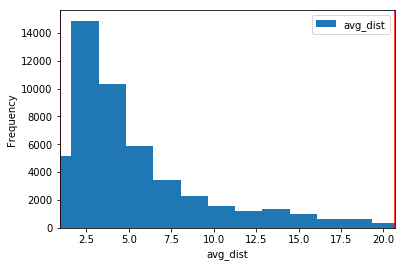

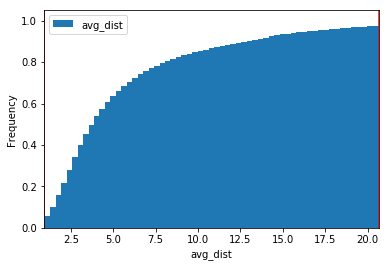

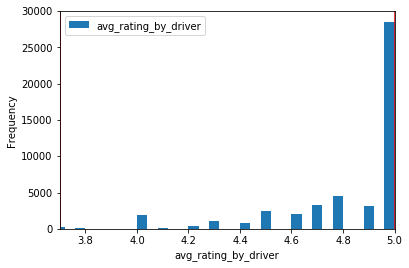

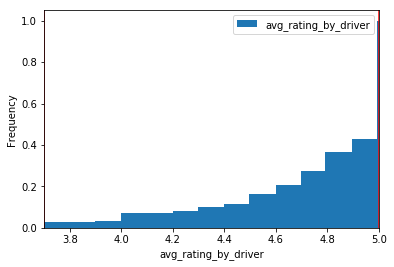

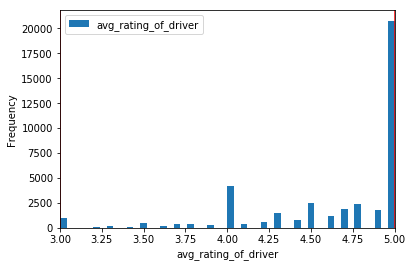

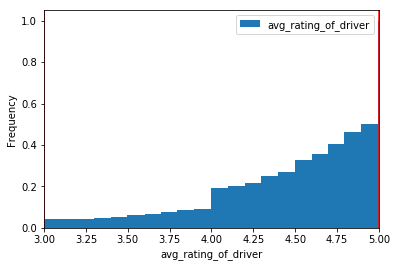

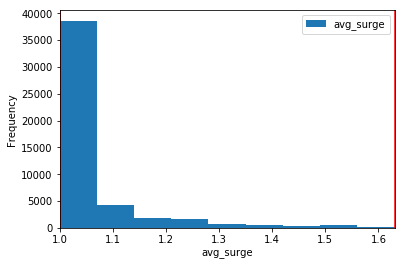

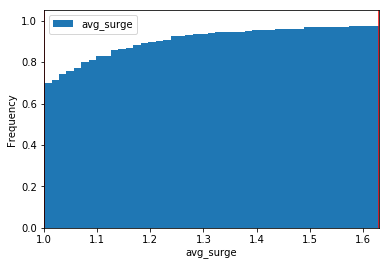

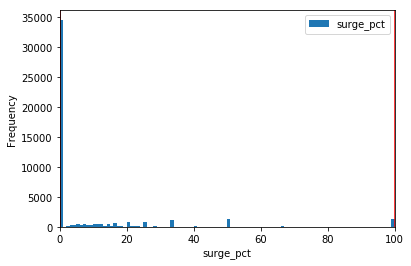

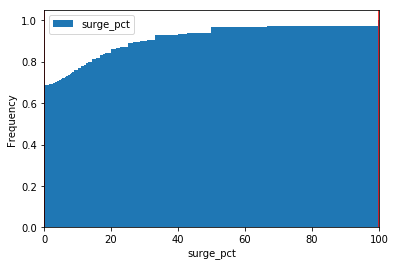

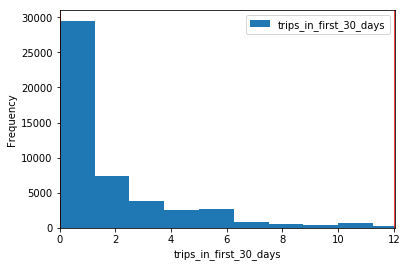

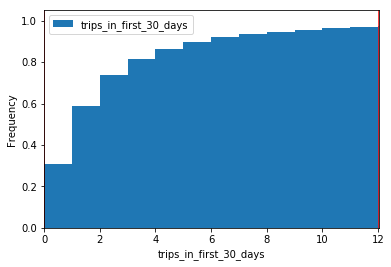

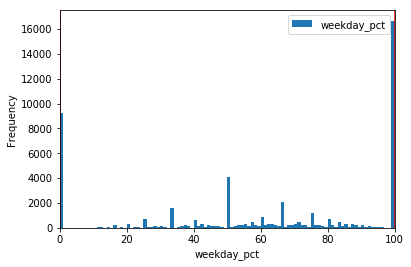

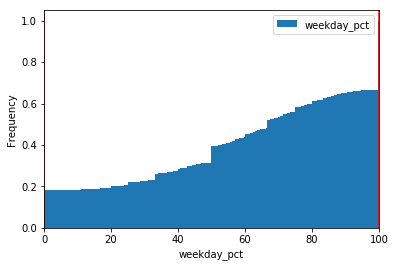

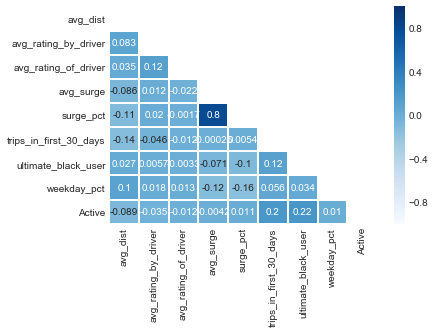

In [64]:
df_2 = a.dropna()


EDA_PLOTTER(cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
        'surge_pct','trips_in_first_30_days', 'weekday_pct',],df1 = a,df2 =df_2)

There are some outliers in the dataset that might need to be removed; particularly in the trip distance column. The data is highly skewed in some columns; for instance, driver rating has a high number of counts at 5 stars. The correlation matrix shows that variables are not highly co-linear. Concerninly, there are low correlations and anti-correlations between whether a driver is currently active and other float columns. notably, there does appear to be some relationship between black usership and number of trips taken and the target variable. Interestingly, there is no correlation or anti-correlation to surge pricing, which may mean rates could rise further without adversely dis-incentivising repeat ridership 6 months after the first trip.

In [90]:
#fill na for average driver rating and drop all other na
print(a.avg_rating_of_driver.mean())

df_final = a 
df_final.avg_rating_of_driver = a.avg_rating_of_driver.fillna(a.avg_rating_of_driver.mean())
df_final = df_final.dropna()



4.601559291274253


In [117]:
df_final["Android"] = df_final.phone == "Android"
df_final["iPhone"] = df_final.phone == "iPhone"

df_final_2 = pd.get_dummies(df_final, prefix= 'city_', columns = ['city'])
    
df_final_2["Kings_Landing"] = df_final_2.iloc[:,15]


print(df_final_2.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

  last_trip_date    phone signup_date  surge_pct  trips_in_first_30_days  \
0     2014-06-17   iPhone  2014-01-25       15.4                       4   
1     2014-05-05  Android  2014-01-29        0.0                       0   
2     2014-01-07   iPhone  2014-01-06        0.0                       3   
3     2014-06-29   iPhone  2014-01-10       20.0                       9   
4     2014-03-15  Android  2014-01-27       11.8                      14   

   ultimate_black_user  weekday_pct  Active  Android  iPhone  city__Astapor  \
0                 True         46.2    True

C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yi6\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
from sklearn.model_selection import train_test_split

X = df_final_2[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'Android', 'iPhone', 'city__Astapor', 'Kings_Landing',
       'city__Winterfell']]

y = df_final_2.Active
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Predicted  False  True   All
True                        
False       5112  1062  6174
True        1453  2255  3708
All         6565  3317  9882


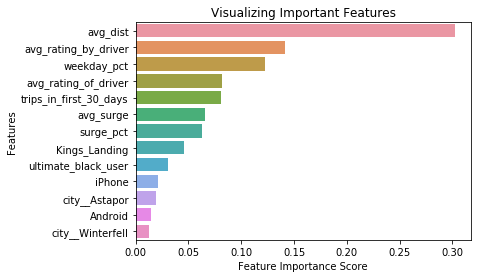

In [126]:
#Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
    
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf =RandomForestClassifier()
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)
a = pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(a)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
    

In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

             precision    recall  f1-score   support

      False       0.78      0.83      0.80      6174
       True       0.68      0.61      0.64      3708

avg / total       0.74      0.75      0.74      9882

0.7180664452558647


The random forest classifier performs reasonably well on the test set given out of the box hyperparameters. I chose this model because it is known to be robust and resistant to over-fitting. The model dows a better job predicting whether someone will not ride in the six month than continue riding. The most important variable is average distance. More work needs to be considered here, but it could be that different types of trips are leading to different rider retention.No correlation was seen in the matrix, so this is somewhat puzzling. Interestingly, average rating of the rider is predictive of churn, which may be a positive for the company to know, since the company may want to spend more time retaining higher rated clientele than the other way round. 